# Resumo
Este projeto tem como objetivo fazer uma análise exploratória completa dos dados de um dataset(extraído do kaggle) de uma loja virtual **fictícia**, com o intuito de saber qual sistema operacional é mais utilizado pelos clientes, qual o que gera mais lucros, entre outras coisas.

**Este ipynb contém mais recursos de programação que os outros por conta que este dataset contem mais de uma informação em suas colunas**

In [351]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [352]:
df = pd.read_csv('Comercio.csv')
df.head(2)

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...",46 in,PM,Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...,Martinez-Herman,6011929061123406,02/20,900,JCB 16 digit,pdunlap@yahoo.com,"Scientist, product/process development",149.146.147.205,el,98.14
1,"9374 Jasmine Spurs Suite 508\nSouth John, TN 8...",28 rn,PM,Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...,"Fletcher, Richards and Whitaker",3337758169645356,11/18,561,Mastercard,anthony41@reed.com,Drilling engineer,15.160.41.51,fr,70.73


# Traduzindo colunas

In [353]:
df.columns = ['endereco', 'lote', 'turno', 'browser', 'companhia', 'cartao de credito',
       'validade do cartao', 'codigo do cartao', 'bandeira do cartao', 'email', 'cargo',
       'ip', 'lingua', 'valor da compra']
df.head()

,endereco,lote,turno,browser,companhia,cartao de credito,validade do cartao,codigo do cartao,bandeira do cartao,email,cargo,ip,lingua,valor da compra
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...",46 in,PM,Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...,Martinez-Herman,6011929061123406,02/20,900,JCB 16 digit,pdunlap@yahoo.com,"Scientist, product/process development",149.146.147.205,el,98.14
1,"9374 Jasmine Spurs Suite 508\nSouth John, TN 8...",28 rn,PM,Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...,"Fletcher, Richards and Whitaker",3337758169645356,11/18,561,Mastercard,anthony41@reed.com,Drilling engineer,15.160.41.51,fr,70.73
2,Unit 0065 Box 5052\nDPO AP 27450,94 vE,PM,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,"Simpson, Williams and Pham",675957666125,08/19,699,JCB 16 digit,amymiller@morales-harrison.com,Customer service manager,132.207.160.22,de,0.95
3,"7780 Julia Fords\nNew Stacy, WA 45798",36 vm,PM,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0 ...,"Williams, Marshall and Buchanan",6011578504430710,02/24,384,Discover,brent16@olson-robinson.info,Drilling engineer,30.250.74.19,es,78.04
4,"23012 Munoz Drive Suite 337\nNew Cynthia, TX 5...",20 IE,AM,Opera/9.58.(X11; Linux x86_64; it-IT) Presto/2...,"Brown, Watson and Andrews",6011456623207998,10/25,678,Diners Club / Carte Blanche,christopherwright@gmail.com,Fine artist,24.140.33.94,es,77.82


#Informações adicionais

In [354]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   endereco            10000 non-null  object 
 1   lote                10000 non-null  object 
 2   turno               10000 non-null  object 
 3   browser             10000 non-null  object 
 4   companhia           10000 non-null  object 
 5   cartao de credito   10000 non-null  int64  
 6   validade do cartao  10000 non-null  object 
 7   codigo do cartao    10000 non-null  int64  
 8   bandeira do cartao  10000 non-null  object 
 9   email               10000 non-null  object 
 10  cargo               10000 non-null  object 
 11  ip                  10000 non-null  object 
 12  lingua              10000 non-null  object 
 13  valor da compra     10000 non-null  float64
dtypes: float64(1), int64(2), object(11)
memory usage: 1.1+ MB


# Verificando dados nulos

In [355]:
df.isnull().sum()

endereco              0
lote                  0
turno                 0
browser               0
companhia             0
cartao de credito     0
validade do cartao    0
codigo do cartao      0
bandeira do cartao    0
email                 0
cargo                 0
ip                    0
lingua                0
valor da compra       0
dtype: int64

***
# Engenharia de recursos
Esse tópico terá como intuito extrair informações importantes das colunas "browser", "cargo", "bandeira do cartao" e "email", como por exemplo o sistema operacional usado, o proprio browser independente da versão, cargos mais comuns, bandeira do cartão filtrada e tambem o provedor de email
### Coletando navegadores

In [356]:
def filtraBrowser(x):
  if "Opera" in x:
    return "Opera"
  
  elif "Mozilla" in x:
    return "Mozilla"
  
  else:
    return "Outros"
    
browsers = df['browser'].apply(lambda x:filtraBrowser(x))

### Coletando sistema operacional

In [357]:
def filtraSO(x):
  if "Linux" in x:
    return "Linux"
  
  elif "Windows" in x:
    return "Windows"
  
  elif "Mac" in x:
    return "Mac"

  else:
    return "Outros"
    
SO = df['browser'].apply(lambda x:filtraSO(x))

### Coletando bandeira do cartão

In [358]:
def filtraBandeira(x):
  if "JCB" in x:
    return "JCB"
  
  elif "VISA" in x:
    return "VISA"
  
  elif "Mastercard" in x:
    return "MASTERCARD"
  
  elif "American Express" in x:
    return "AM_EXPRESS"
  
  else:
    return "Outros"
    
bandeira = df['bandeira do cartao'].apply(lambda x:filtraBandeira(x))
bandeira

0              JCB
1       MASTERCARD
2              JCB
3           Outros
4           Outros
           ...    
9995           JCB
9996           JCB
9997          VISA
9998    AM_EXPRESS
9999           JCB
Name: bandeira do cartao, Length: 10000, dtype: object

### Coletando provedores de email
Para isso, verificamos os emails mais utilizados

In [359]:
df['email'].apply(lambda x:x.split("@")[1]).value_counts()

hotmail.com              1638
yahoo.com                1616
gmail.com                1605
smith.com                  42
williams.com               37
                         ... 
frey-ward.com               1
marquez-castillo.biz        1
wade-garner.com             1
collins-cole.info           1
morales-schneider.net       1
Name: email, Length: 3416, dtype: int64

### Coletando os emails mais utilizados

In [360]:
def filtraEmail(x):
  if "yahoo" in x:
    return "yahoo"
  
  elif "hotmail" in x:
    return "hotmail"
  
  elif "gmail" in x:
    return "gmail"

  else:
    return "Outros"

provedores = df['email'].apply(lambda x:x.split("@")[1])
provedores = provedores.apply(lambda x:x.split(".")[0])
provedores = provedores.apply(lambda x:filtraEmail(x))

# Adicionando as novas informaçoes no dataframe

In [361]:
df["browser"] = browsers
df["sistema operacional"] = SO
df["email"] = provedores
df["bandeira do cartao"] = bandeira

# Excluindo informações desnecessárias para a análise

In [362]:
df.drop(["endereco","companhia","cartao de credito","codigo do cartao","ip",'cargo','lote'], axis=1, inplace=True)

***
# **Visualizando modificações do dataframe** 

In [363]:
df.head()

,turno,browser,validade do cartao,bandeira do cartao,email,lingua,valor da compra,sistema operacional
0,PM,Opera,02/20,JCB,yahoo,el,98.14,Linux
1,PM,Opera,11/18,MASTERCARD,Outros,fr,70.73,Windows
2,PM,Mozilla,08/19,JCB,Outros,de,0.95,Windows
3,PM,Mozilla,02/24,Outros,Outros,es,78.04,Mac
4,AM,Opera,10/25,Outros,gmail,es,77.82,Linux


***
# **Visualizando dados**
##Visualizando compras por turno

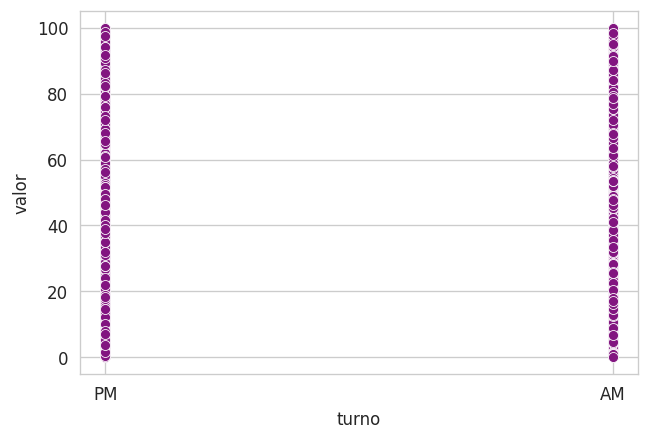

In [364]:
sns.set_style("whitegrid")
plt.figure(dpi=120)
sns.set_palette("BuPu_r")
plt.ylabel("valor")
sns.scatterplot(y="valor da compra", x="turno", data=df)
plt.show()

Obs: Há um equilibrio de quantidade de compras realizadas por turno
***

## Visualizando valor da compra por bandeira do cartão

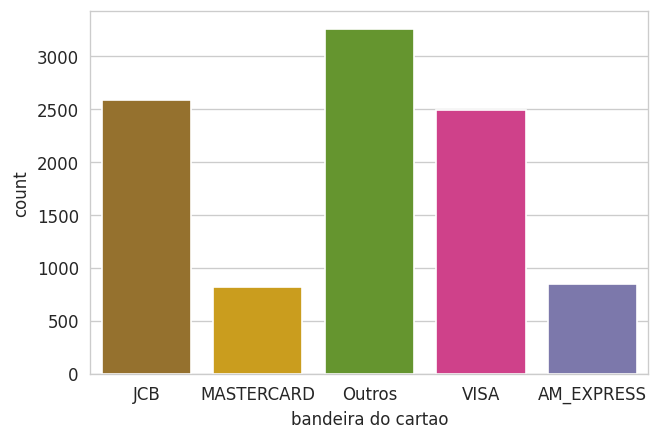

In [365]:
plt.figure(dpi=120)
sns.set_palette("Dark2_r")
plt.ylabel("valor")
sns.countplot(x="bandeira do cartao", data=df)
plt.show()

Obs: As banddeiras mais variadas juntas são responsáveis pela grande maioria das compras realizadas
***

## Sistemas operacionais mais usados

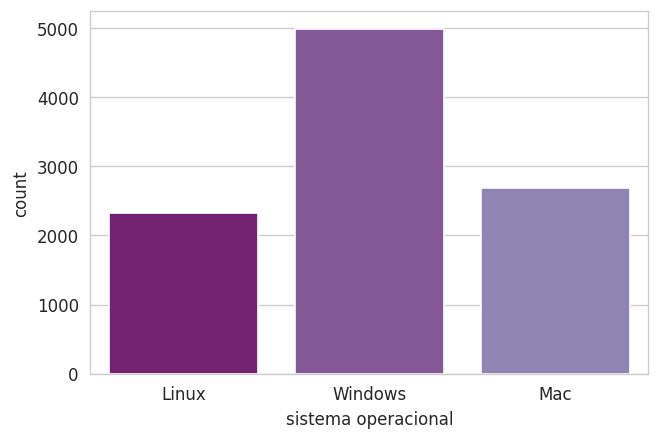

In [366]:
plt.figure(dpi=120)
sns.set_palette("BuPu_r")
plt.ylabel("quantidade")
sns.countplot(x="sistema operacional",data=df)
plt.show()

***

## Browser mais utilizado

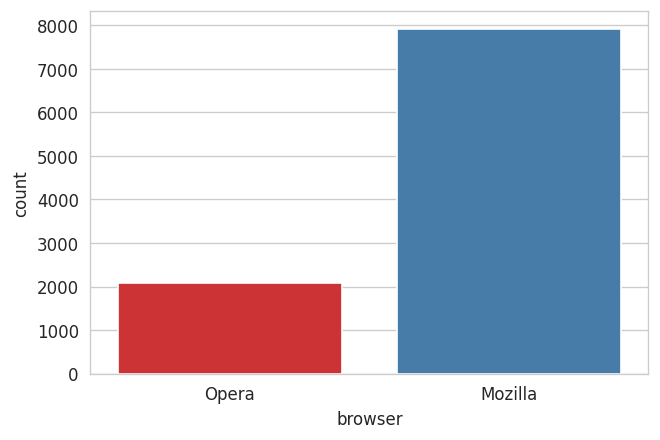

In [367]:
plt.figure(dpi=120)
sns.set_palette("Set1")
plt.ylabel("quantidade")
sns.countplot(x="browser",data=df)
plt.show()

***
# Agrupamentos
## Agrupando media de compras realizadas por browser

In [368]:
df[["valor da compra","browser"]].groupby("browser").mean()

,valor da compra
browser,
Mozilla,50.194543
Opera,50.930376


Obs: É notavel que, por mais que o mozilla tenha a maior quantidade de compras realizadas, as compras pelo opera sao mais caras ao ponto de se igualar as do mozilla.
Em média 50 mil de lucro gerado por compras realizadas por ambos os navegadores
***

## Agrupando media de compras realizadas por sistema operacional

In [369]:
df[["valor da compra","sistema operacional"]].groupby("sistema operacional").mean()

,valor da compra
sistema operacional,
Linux,50.852898
Mac,49.159955
Windows,50.750354


Obs: Também é notável que por mais que o windows ganhe disparado em quantidade de clientes, o linux contém usuários que fazem compras mais robustas
***

## Agrupando media de compras realizadas por turno

In [370]:
df[["valor da compra","turno"]].groupby("turno").mean()

,valor da compra
turno,
AM,50.186511
PM,50.503779


***
## Agrupando media de compras realizadas por email

In [371]:
df[["valor da compra","email"]].groupby("email").mean()

,valor da compra
email,
Outros,50.267607
gmail,49.269371
hotmail,51.165995
yahoo,50.841590


***
## Agrupando media de compras realizadas por bandeira 

In [372]:
df[["valor da compra",'bandeira do cartao']].groupby("bandeira do cartao").mean()

,valor da compra
bandeira do cartao,
AM_EXPRESS,50.489423
JCB,49.912512
MASTERCARD,50.043015
Outros,50.718954
VISA,50.363323


***
# Conclusão
### Windows é o mais utilizado, mas não tem o melhor historico de lucros, ambos os sistemas possuem um equilibrio em seus dados o suficiente para nao optar por um especifico